Your first goal is to align each image in the sequence to the first image. Once aligned, the images will be averaged to yield a (partially) denoised image.

Write a python function that takes as input two images and returns the horizontal and vertical offset that best aligns the two images. You need only search an offset between +/- 15 pixels. Use a simple brute-force approach to search over all horizontal and vertical translations in this range and find the translation that best aligns the images. You can use a simple sum of squared pixel differences from the green channel only as a measure of alignment. You may find the numpy function roll useful for translating an image.

Align each image to the first image and denoise by pixel-wise averaging all of the aligned images (I scaled the images into the pixel intensity range [0,1] to avoid numeric overflow).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
# importing images
img_list = []
for i in range(1,19):
    img_list.append(plt.imread('../Computer Vision/a2-images/noise-small-' + str(i) + '.png'))

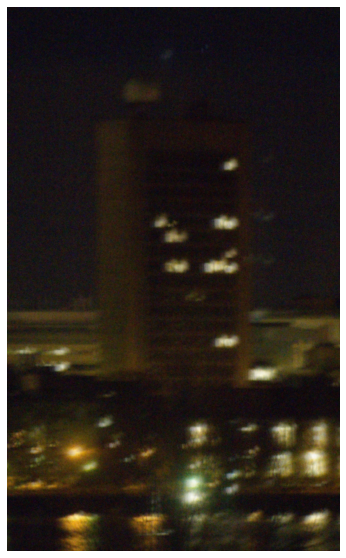

In [3]:
# viewing the average of the images
start = np.mean(img_list, axis=0)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(start)

In [4]:
# rolls whole image - finds horizontal and vertical offset at the same time
def align(img1,img2):
    vertical_off = 0
    horizontal_off = 0
    images = []
    sse_counter = []
    idx = []
    for i in range(-15,16):
        for j in range(-15,16):
            images.append(np.roll(img2, (i,j), axis=(1,0)))
            idx.append([i,j])
    for img in images:
        diff = np.square(img[:,:,1]-img1[:,:,1])
        sse = np.sum(diff)
        sse_counter.append(sse)
    
    
    min_value = sse_counter.index(min(sse_counter))
    horizontal_off,vertical_off = idx[min_value][0],idx[min_value][1]
    
    return horizontal_off, vertical_off

In [5]:
# aligning 1st and 2nd images
h,v = align(img_list[0],img_list[1])
new_img = np.roll(img_list[1], (h,v), axis=(1,0))

(-0.5, 615.5, 1006.5, -0.5)

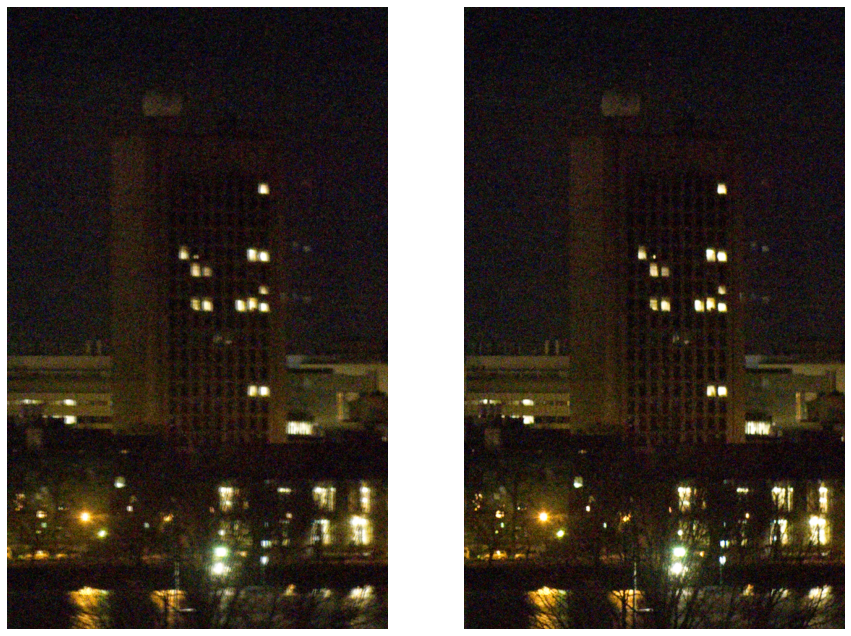

In [6]:
# viewing old average of 1st and second images vs new average
old = [img_list[0], img_list[1]]
new = [img_list[0], new_img]
old_avg = np.mean(old, axis=0)
new_avg = np.mean(new, axis=0)

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(old_avg)
ax[0].axis('off')
ax[1].imshow(new_avg)
ax[1].axis('off')


In [7]:
# finding offsets for all images in img_listin order to align to first image
offsets = []
for i in range(1,18):
    v, h = align(img_list[0],img_list[i])
    offsets.append([v,h])
    

In [8]:
# making a new list of images to contain the best image transformations
new_images = []
for i in range(1,18):
    new_img = np.roll(img_list[i], (offsets[i-1][0],offsets[i-1][1]), axis=(1,0))
    new_images.append(new_img)

(-0.5, 615.5, 1006.5, -0.5)

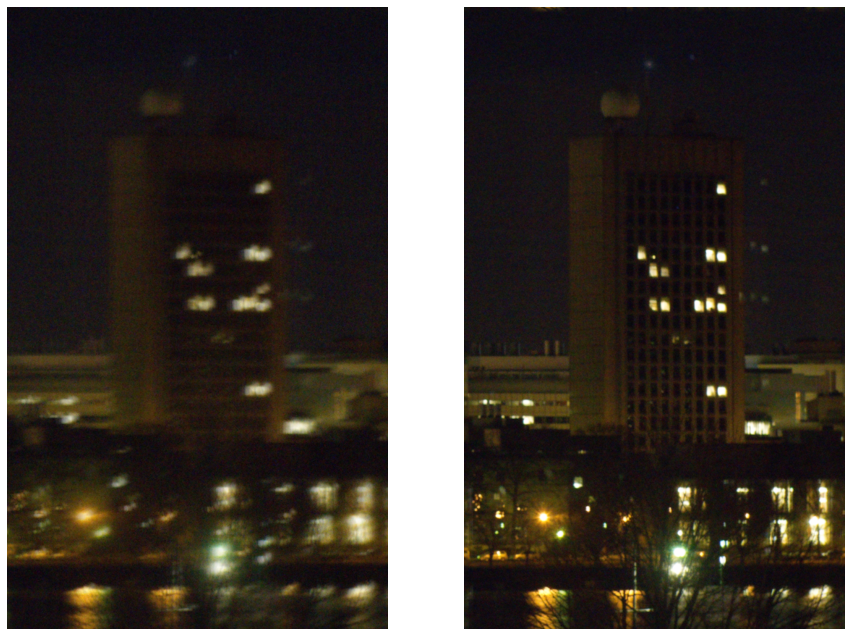

In [9]:
# comparing the first average of all the images to the average after aligning the images
final = np.mean(new_images, axis=0)

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(start)
ax[0].axis('off')
ax[1].imshow(final)
ax[1].axis('off')